In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Kütüphane importları ve dosyayı okutma

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import datetime as dt

import warnings
warnings.simplefilter(action="ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.expand_frame_repr', False)

In [ ]:
# ilaydaoptima
llcp2023 = pd.read_csv("/content/drive/MyDrive/Kurs/Final Proje/LLCP2023.csv")

In [104]:
# ilaydayvat
llcp2023 = pd.read_csv("/content/drive/MyDrive/Final Proje/LLCP2023.csv")

# ***Değişken Düzenleme***

Dosyanın kopyasını aldık ve dosya boyutunu kontrol ettik

In [105]:
df23 = llcp2023.copy()
df23.shape

(433323, 350)

Doğru bilgi vermeyeceği için görüşmeyi tamamlamayan gözlemleri data set içerisinden çıkarttık. Görüşmenin başında yapılan ve önemli bilgi taşımayan değişkenleri dropladık.

In [106]:
# Görüşmeyi tamamlamamış olan örnekleri çıkarttık
df23 = df23[(df23['DISPCODE'] != 1200)]
df23 = df23.drop(columns=["SEQNO", "FMONTH", "IMONTH", "IDAY", "IYEAR", "DISPCODE", "CTELENM1",
                          "CTELNUM1", "STATERE1", "CSTATE1", "CELPHON1", "CELLFON5", "IDATE",
                          "PVTRESD1", "COLGHOUS", "LADULT1", "NUMADULT", "LANDSEX2", "PVTRESD3",
                          "CCLGHOUS", "CADULT1", "HHADULT", "CELLSEX2"])
df23.shape

(356261, 327)

Veri seti içerisinde türetilmiş değişkenler bulunmaktaydı. Bu değişkenler _ ile belirtilmişti. Bizim için önemli olabilicek STATE, AGECATEGORY ve RACE değişkenlerini _ olmadan veri seti içerisine kopyaladık ve _ içeren değişkenleri dropladık.

In [107]:
# İşimize yarayabilecek olan _ içeren değişkenleri çiftledik
df23["AGECAT"] = df23["_AGEG5YR"]
df23["RACE"] = df23["_RACEGR3"]

# _ içeren değişkenleri düşürdük
columns_to_drop = [col for col in df23.columns if '_' in col] # (356261, 245)
columns_to_drop
df23.drop(columns=columns_to_drop, inplace=True)
df23.shape

(356261, 241)

Elimizde 243 değişken kaldı. Bunlar için missing değerlere baktık (report_missing fonksiyonu ile). drop_missing fonksiyonu ile belli bir yüzde üzerinde missing değer barındıran değişkenleri dropladık.

In [108]:
# Missing Değerler için ilk yapılan işlem
def report_missing(dataframe):
  missing_counts = dataframe.isnull().sum()
  missing_percentages = 100 * dataframe.isnull().sum() / len(dataframe)
  missing_report = missing_percentages[missing_percentages > 0.0000].to_frame(name='Missing Percentage')
  missing_report["Missing Count"] = missing_counts
  missing_columns = missing_report.index.tolist()
  return missing_counts, missing_report, missing_percentages, missing_columns

def drop_missing(df, threshold=60, exclude=None):
    if exclude is None:
        exclude = []
    # Eksik değer yüzdelerini hesapla
    missing_percentages = df.isnull().mean() * 100
    # Drop edilmesi gereken sütunları bul (exclude hariç)
    cols_to_drop = missing_percentages[(missing_percentages > threshold) & (~missing_percentages.index.isin(exclude))].index
    # Sütunları drop et
    df = df.drop(columns=cols_to_drop)
    return df, cols_to_drop

In [109]:
# Missing Değerlerin Yüzdeliğine ve Sayılarına Baktık
missing_counts, missing_report, missing_percentages, missing_columns = report_missing(df23)
missing_report

,Missing Percentage,Missing Count
RESPSLC1,87.293,310992
LNDSXBRT,99.962,356124
SAFETIME,21.506,76619
CELSXBRT,99.469,354369
LANDLINE,21.507,76620
GENHLTH,0.000,1
PHYSHLTH,0.000,1
POORHLTH,41.541,147996
PRIMINS1,0.001,3
PERSDOC3,0.000,1


In [110]:
missing_report.shape

(204, 2)

In [111]:
# Belli Bir Değer (%60 olarak belirledik) Altındaki Değişkenleri Dataframeden düşürdük
df23, cols_to_drop = drop_missing(df23, threshold=60)
df23.shape

(356261, 90)

In [112]:
missing_counts, missing_report, missing_percentages, missing_columns = report_missing(df23)
missing_report

,Missing Percentage,Missing Count
SAFETIME,21.506,76619
LANDLINE,21.507,76620
GENHLTH,0.000,1
PHYSHLTH,0.000,1
POORHLTH,41.541,147996
PRIMINS1,0.001,3
PERSDOC3,0.000,1
EXRACT12,24.746,88160
EXEROFT1,25.212,89819
EXERHMM1,25.212,89821


18 yaşının altındaki gözlemleri veri setinden çıkarttık. ***(Nedenini açıkla)*** kalan 92 değişken içerisinden önemli bir bilgi taşımayan değişkenleri dropladık.

In [113]:
df23 = df23[(df23['AGECAT'] != 14)]
df23 = df23.drop(columns=['SAFETIME' , 'LANDLINE' , 'POORHLTH' , 'PRIMINS1', 'PERSDOC3' ,
                          'MEDCOST1' , 'CHECKUP1' , 'STRENGTH' , 'MARITAL' , 'EDUCA' ,
                          'RENTHOM1' , 'CPDEMO1C' , 'VETERAN3' , 'EMPLOY1' , 'CHILDREN' ,
                          'INCOME3' , 'DECIDE' , 'DIFFDRES' , 'DIFFALON' , 'FALL12MN' ,
                          'SMOKE100' , 'DRNK3GE5' , 'MAXDRNKS' , 'FLSHTMY3' , 'HIVTST7' ,
                          'SEATBELT' , 'DRNKDRI2' , 'PDIABTS1' , 'HEATTBCO' , 'TRNSGNDR' ,
                          'LSATISFY' , 'EMTSUPRT' , 'SDLONELY' , 'SDHEMPLY' , 'FOODSTMP' ,
                          'SDHFOOD1' , 'SDHBILLS' , 'SDHUTILS' , 'SDHTRNSP' , 'SDHSTRE1' ,
                          'QSTVER' , 'QSTLANG' , 'HTIN4' , 'HTM4' , 'WTKG3' , 'DRNKANY6' ,
                          'EXRACT22', 'EXEROFT2', 'EXERHMM2', 'PREDIAB2', 'EXRACT12']) # 52
df23.shape

(350929, 39)

In [114]:
missing_counts, missing_report, missing_percentages, missing_columns = report_missing(df23)
missing_report

,Missing Percentage,Missing Count
GENHLTH,0.000,1
PHYSHLTH,0.000,1
EXEROFT1,25.181,88369
EXERHMM1,25.182,88371
BPMEDS1,58.179,204168
TOLDHI3,11.083,38895
CHOLMED3,11.484,40299
CVDSTRK3,0.000,1
HEIGHT3,0.000,1
ALCDAY4,0.001,2


In [115]:
missing_columns

['GENHLTH',
 'PHYSHLTH',
 'EXEROFT1',
 'EXERHMM1',
 'BPMEDS1',
 'TOLDHI3',
 'CHOLMED3',
 'CVDSTRK3',
 'HEIGHT3',
 'ALCDAY4',
 'AVEDRNK3',
 'SHINGLE2',
 'COVIDSM1',
 'RACE']

Bazı değişkenleri içerisinde 7-9, 77-99, 777-999, 7777-9999 değerler "bilmiyorum / reddediyorum" gibi cevaplara denk geliyordu. Bu gözlemleri aynı nedenden dolayı veri seti içerisinden sildik. "SEQNO", "SEXVAR", "STATE", "AGECAT" değişkenleri içerisinde bu cevaplar olmadığı için bu dğeişkenleri dışarıda tuttuk.

In [116]:
# 7-9, 77-99, 777-999, 7777-9999 olan değerlerin üstesinden geldik
cols = [col for col in df23.columns if col not in ["SEQNO", "SEXVAR", "STATE", "AGECAT"]]
for col in cols:
  if df23[col].max() < 10:
    df23 = df23[~df23[col].isin([7, 9])]
  elif df23[col].max() < 100:
    df23 = df23[~df23[col].isin([77, 99])]
  elif df23[col].max() < 1000:
    df23 = df23[~df23[col].isin([777, 999])]
  elif df23[col].max() < 10000:
    df23 = df23[~df23[col].isin([7777, 9999])]

In [117]:
missing_counts, missing_report, missing_percentages, missing_columns = report_missing(df23)
missing_report

,Missing Percentage,Missing Count
EXEROFT1,23.822,59535
EXERHMM1,23.823,59537
BPMEDS1,57.279,143149
TOLDHI3,5.357,13387
CHOLMED3,5.777,14438
HEIGHT3,0.000,1
ALCDAY4,0.000,1
AVEDRNK3,45.525,113773
SHINGLE2,31.475,78660
COVIDSM1,48.846,122073


In [118]:
df23.shape

(249915, 39)

# ***Birim Dönüşümleri***

"KİLO" "BOY", "AKTİVİTE SIKLIĞI" gibi değişkenlerde birim tutarsızlıkları ile karşılaştık. Codebook referansına göre gerekli dönüşümleri gerçekleştirdik.

In [119]:
def converting_height(height):
  if 0 <= height <= 8999:
    return ((height // 100) * 12 + (height % 100)) * 0.0254
  elif 9000 <= height < 10000:
    return (height - 9000) / 100

def converting_weight(weight):
  if 0 < weight < 8999:
    return weight * 0.4535924
  elif 9000 < weight < 10000:
    return weight - 9000

df23["HEIGHTCM"] = df23["HEIGHT3"].apply(converting_height)
df23["WEIGHTKG"] = df23["WEIGHT2"].apply(converting_weight)
df23 = df23.drop(columns=["WEIGHT2", "HEIGHT3"])

In [120]:
# EXRACTM_ değişkeni: Günlük ortalama aktivite süresi
def calculate_daily_minutes(row):
    freq = row["EXEROFT1"]
    duration = row["EXERHMM1"]
    if pd.isnull(freq) or pd.isnull(duration):
        return None

    if 101 <= freq <= 199:
        times_per_week = freq - 100
        daily_freq = times_per_week / 7
    elif 201 <= freq <= 299:
        times_per_month = freq - 200
        daily_freq = times_per_month / 30
    else:
        return None

    # Süre: dakika cinsinden
    if 1 <= duration <= 759:
        minutes = duration
    elif 800 <= duration <= 899:
        minutes = (duration - 800) * 60
    else:
        return None
    return round(daily_freq * minutes, 2)

df23["EXRACTM"] = df23.apply(calculate_daily_minutes, axis=1)
df23 = df23.drop(columns=["EXEROFT1", "EXERHMM1"])

In [121]:
df23.shape

(249915, 38)

In [122]:
missing_counts, missing_report, missing_percentages, missing_columns = report_missing(df23)
missing_report

,Missing Percentage,Missing Count
BPMEDS1,57.279,143149
TOLDHI3,5.357,13387
CHOLMED3,5.777,14438
ALCDAY4,0.000,1
AVEDRNK3,45.525,113773
SHINGLE2,31.475,78660
COVIDSM1,48.846,122073
RACE,0.019,47
HEIGHTCM,0.000,1
EXRACTM,24.060,60129


# ***Missing Değerler Üzerinde İşlemler***

In [123]:
missing_counts, missing_report, missing_percentages, missing_columns = report_missing(df23)
missing_report

,Missing Percentage,Missing Count
BPMEDS1,57.279,143149
TOLDHI3,5.357,13387
CHOLMED3,5.777,14438
ALCDAY4,0.000,1
AVEDRNK3,45.525,113773
SHINGLE2,31.475,78660
COVIDSM1,48.846,122073
RACE,0.019,47
HEIGHTCM,0.000,1
EXRACTM,24.060,60129


Veri seti içerisindeki bazı missing değerler belli bir bilgi barındırıyordu. Mesela diyabet hastası olmayan gözlemlerin kullandığı ilaç missing olarak atanmıştı. Bunun için fonksiyon oluşturduk (missing_values). Codebook a bakarak missing değerleri gerçek değerler ile doldurduk.

In [124]:
def missing_values(dataframe, target_col, cond_col, cond_value, target_value):
    condition = (dataframe[cond_col] == cond_value) & (dataframe[target_col].isna())
    dataframe.loc[condition, target_col] = target_value

In [125]:
missing_values(df23, "BPMEDS1", "BPHIGH6", 2, 2)
missing_values(df23, "BPMEDS1", "BPHIGH6", 3, 2)
missing_values(df23, "BPMEDS1", "BPHIGH6", 4, 2)
missing_values(df23, "TOLDHI3", "CHOLCHK3", 1, 2)
missing_values(df23, "CHOLMED3", "CHOLCHK3", 1, 2)
df23 = df23.drop(columns=["CHOLCHK3"])
df23["ALCDAY4"].fillna(df23["ALCDAY4"].mean())

missing_values(df23, "AVEDRNK3", "ALCDAY4", 888, 88)
df23 = df23.drop(columns=["ALCDAY4"])
df23["SHINGLE2"].fillna(2, inplace=True)
missing_values(df23, "COVIDSM1", "COVIDPO1", 2, 2)
df23["RACE"].fillna(df23["RACE"].mode()[0], inplace=True)
df23["HEIGHTCM"].fillna(df23["HEIGHTCM"].mean(), inplace=True)
missing_values(df23, "EXRACTM", "EXERANY2", 2, 0)

PHYSHLTH:
MENTHLTH:
AVEDRNK3:

Bu değişkenlerdeki 88 değeri aslında None olarak cevap verildiği için 0 değerine karşılık geliyordu. Bunun için gerekli atamaları yaptık. (Numerik değerler olduğu için)

In [126]:
df23[["PHYSHLTH", "MENTHLTH", "AVEDRNK3"]] = df23[["PHYSHLTH", "MENTHLTH", "AVEDRNK3"]].replace(88, 0)

In [127]:
missing_counts, missing_report, missing_percentages, missing_columns = report_missing(df23)
missing_report

,Missing Percentage,Missing Count
CHOLMED3,0.421,1051
EXRACTM,0.563,1407


Missing değerlere atama yaptıktan sonra elimizde 'CHOLMED3', 'EXRACTM' değişkenlerinde referans verilmeyen değerler kaldı. Bunları veri seti içerisinden çıkarttık.

In [128]:
df23.dropna(inplace=True, subset=['CHOLMED3', 'EXRACTM'])
df23.shape

(247463, 36)

In [129]:
df23.head()

,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,EXERANY2,BPHIGH6,BPMEDS1,TOLDHI3,CHOLMED3,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,CHCSCNC1,CHCOCNC1,CHCCOPD3,ADDEPEV3,CHCKDNY2,HAVARTH4,DIABETE4,DEAF,BLIND,DIFFWALK,USENOW3,ECIGNOW2,AVEDRNK3,FLUSHOT7,PNEUVAC4,SHINGLE2,COVIDPO1,COVIDSM1,AGECAT,RACE,HEIGHTCM,WEIGHTKG,EXRACTM
0,2.000,2.000,0.000,0.000,2.000,1.000,1.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,1.000,2.000,2.000,1.000,3.000,1.000,0.000,2.000,2.000,2.000,2.000,2.000,13.000,1.000,1.600,78.018,0.000
1,2.000,2.000,0.000,0.000,1.000,1.000,2.000,1.000,1.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,1.000,2.000,1.000,3.000,1.000,2.000,2.000,3.000,1.000,0.000,1.000,1.000,2.000,2.000,2.000,13.000,1.000,1.448,59.874,25.710
3,2.000,2.000,2.000,0.000,1.000,3.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,1.000,1.000,2.000,1.000,2.000,1.000,3.000,2.000,2.000,1.000,3.000,1.000,0.000,1.000,1.000,2.000,2.000,2.000,12.000,1.000,1.676,77.111,12.860
4,2.000,4.000,0.000,0.000,1.000,1.000,1.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,1.000,2.000,1.000,2.000,1.000,1.000,2.000,2.000,1.000,2.000,1.000,1.000,2.000,1.000,2.000,2.000,2.000,12.000,1.000,1.727,77.111,12.860
5,2.000,3.000,2.000,3.000,1.000,1.000,1.000,1.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,3.000,2.000,2.000,2.000,3.000,1.000,2.000,2.000,2.000,2.000,1.000,2.000,9.000,2.000,1.575,74.843,18.000


In [130]:
missing_counts, missing_report, missing_percentages, missing_columns = report_missing(df23)
missing_report

,Missing Percentage,Missing Count
SEXVAR,NaN,0
GENHLTH,NaN,0
PHYSHLTH,NaN,0
MENTHLTH,NaN,0
EXERANY2,NaN,0
BPHIGH6,NaN,0
BPMEDS1,NaN,0
TOLDHI3,NaN,0
CHOLMED3,NaN,0
CVDINFR4,NaN,0


In [131]:
df23.shape

(247463, 36)

# ***Değişken İsimleri Değiştirme***

Okunabilirlik açısından değişken isimlerini düzenledik. Veri setinin içerisindeki cevapları belirli bir sayıya karşılık geldiği için bütün değişkenler numeric değişken olarak görünüyordu. Verilen cevaplara gerekli atamaları yaptık.

In [132]:
new_cols = ["Sex", "GeneralHealth", "PhysicalHealth", "MentalHealth",
            "DoingExercise", "HighBloodPressure", "HighBloodPressureDrug",
            "HighColesterol", "HighColesterolDrug", "HadHeartAttack", "HadCoronaryHeartDisease",
            "HadStroke", "HadAsthma", "HadSkinCancer", "HadOtherCancer", "HadLungDisease",
            "HadDepressiveDisorder", "HadKidneyDisease", "HadArthritis", "HadDiabate",
            "Deaf", "Blind", "DifficultyWalking", "SmokeUsing", "ECigaretteUsing",
            "AlcoholUsingAver", "HadFluVac", "HadPneumVac", "HadZonaVac", "HadCovid",
            "HadCovidSemp", "AgeCategory", "Race", "Height", "Weight", "DailyExerciseAver"]
len(new_cols)

36

In [133]:
df23.columns = new_cols

In [134]:
YES_NO_QUESTIONS = {1: 'Yes', 2: 'No'}
unique_2_cols = [col for col in df23.columns if col != "Sex" and df23[col].nunique() == 2]
for col in unique_2_cols:
  df23[col] = df23[col].map(YES_NO_QUESTIONS)

In [135]:
SEX = {1: 'Male', 2: 'Female'}
df23["Sex"] = df23["Sex"].map(SEX)

In [136]:
GENERAL_HEALTH = {1: 'Excellent', 2: 'Very good', 3: "Good", 4: "Fair", 5: "Poor"}
df23["GeneralHealth"] = df23["GeneralHealth"].map(GENERAL_HEALTH)

In [137]:
BLOOD_PRESSURE = {1: "Yes", 2: "Yes, but female told only during pregnancy", 3: "No", 4: "Told borderline high or pre-hypertensive or elevated blood pressure"}
df23["HighBloodPressure"] = df23["HighBloodPressure"].map(BLOOD_PRESSURE)

In [138]:
DIABETE = {1: "Yes", 2: "Yes, but female told only during pregnancy", 3: "No", 4: "No, pre-diabetes or borderline diabetes"}
df23["HadDiabate"] = df23["HadDiabate"].map(DIABETE)

In [139]:
SMOKE = {1: "Every day", 2: "Some days", 3: "Not at all"}
df23["SmokeUsing"] = df23["SmokeUsing"].map(SMOKE)

In [140]:
ECIGARETTE = {1: "Not at all", 2: "Every day", 3: "Some days", 4: "Not at all"}
df23["ECigaretteUsing"] = df23["ECigaretteUsing"].map(ECIGARETTE)

In [141]:
RACE = {1: 'White only, Non-Hispanic',
        2: 'Black only, Non-Hispanic',
        3: "Other race only, Non-Hispanic",
        4: "Multiracial, Non-Hispanic",
        5: "Hispanic"}
df23["Race"] = df23["Race"].map(RACE)

In [142]:
AGE_CATEGORY = {1: '18 to 24', 2: '25 to 29', 3: "30 to 34", 4: "35 to 39", 5: "40 to 44",
                6: "45 to 49", 7: "50 to 54", 8: "55 to 59", 9: "60 to 64", 10: "65 to 69",
                11: "70 to 74", 12: "75 to 79", 13: "80 or older"}
df23["AgeCategory"] = df23["AgeCategory"].map(AGE_CATEGORY)

In [143]:
df23.head()

,Sex,GeneralHealth,PhysicalHealth,MentalHealth,DoingExercise,HighBloodPressure,HighBloodPressureDrug,HighColesterol,HighColesterolDrug,HadHeartAttack,HadCoronaryHeartDisease,HadStroke,HadAsthma,HadSkinCancer,HadOtherCancer,HadLungDisease,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabate,Deaf,Blind,DifficultyWalking,SmokeUsing,ECigaretteUsing,AlcoholUsingAver,HadFluVac,HadPneumVac,HadZonaVac,HadCovid,HadCovidSemp,AgeCategory,Race,Height,Weight,DailyExerciseAver
0,Female,Very good,0.000,0.000,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,Yes,Not at all,Not at all,0.000,No,No,No,No,No,80 or older,"White only, Non-Hispanic",1.600,78.018,0.000
1,Female,Very good,0.000,0.000,Yes,Yes,No,Yes,Yes,No,No,No,No,No,No,No,Yes,No,Yes,No,Yes,No,No,Not at all,Not at all,0.000,Yes,Yes,No,No,No,80 or older,"White only, Non-Hispanic",1.448,59.874,25.710
3,Female,Very good,2.000,0.000,Yes,No,No,No,No,No,No,No,No,Yes,Yes,No,Yes,No,Yes,No,No,No,Yes,Not at all,Not at all,0.000,Yes,Yes,No,No,No,75 to 79,"White only, Non-Hispanic",1.676,77.111,12.860
4,Female,Fair,0.000,0.000,Yes,Yes,Yes,No,No,No,No,No,No,No,Yes,No,Yes,No,Yes,Yes,No,No,Yes,Some days,Not at all,1.000,No,Yes,No,No,No,75 to 79,"White only, Non-Hispanic",1.727,77.111,12.860
5,Female,Good,2.000,3.000,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Not at all,Not at all,2.000,No,No,No,Yes,No,60 to 64,"Black only, Non-Hispanic",1.575,74.843,18.000


# ***Aykırı Değerler***

In [144]:
df23.dtypes

,0
Sex,object
GeneralHealth,object
PhysicalHealth,float64
MentalHealth,float64
DoingExercise,object
HighBloodPressure,object
HighBloodPressureDrug,object
HighColesterol,object
HighColesterolDrug,object
HadHeartAttack,object


In [145]:
df23.shape

(247463, 36)

Kategorik ve nümerik değişkenleri yakaladık. cat_summary ve num_summary ile değişkenlerimizin anlamlılıklarına baktık. Numerik değişkenler içerisinde bulunan aykırı değerler için gerekli işlemleri yaptık. Aykırı değerleri mantıksal yolla veri seti içerisinden dropladık. Mesela kilo için 300 kilonun üzerindeki insanları veri setinden ayıkladık.

In [146]:
def grab_col_names(dataframe):
  # cat_cols, cat_but_car
  cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes=="O"]
  # num_cols
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
  num_cols = [col for col in num_cols if col not in cat_cols]

  print(f"Observation: {dataframe.shape[0]}")
  print(f"Variables: {dataframe.shape[1]}")
  print(f"cat_cols: {len(cat_cols)}")
  print(f"num_cols: {len(num_cols)}")
  return cat_cols, num_cols

In [147]:
cat_cols, num_cols = grab_col_names(df23)

Observation: 247463
Variables: 36
cat_cols: 30
num_cols: 6


In [148]:
num_cols

['PhysicalHealth',
 'MentalHealth',
 'AlcoholUsingAver',
 'Height',
 'Weight',
 'DailyExerciseAver']

In [149]:
cat_cols

['Sex',
 'GeneralHealth',
 'DoingExercise',
 'HighBloodPressure',
 'HighBloodPressureDrug',
 'HighColesterol',
 'HighColesterolDrug',
 'HadHeartAttack',
 'HadCoronaryHeartDisease',
 'HadStroke',
 'HadAsthma',
 'HadSkinCancer',
 'HadOtherCancer',
 'HadLungDisease',
 'HadDepressiveDisorder',
 'HadKidneyDisease',
 'HadArthritis',
 'HadDiabate',
 'Deaf',
 'Blind',
 'DifficultyWalking',
 'SmokeUsing',
 'ECigaretteUsing',
 'HadFluVac',
 'HadPneumVac',
 'HadZonaVac',
 'HadCovid',
 'HadCovidSemp',
 'AgeCategory',
 'Race']

In [150]:
def num_summary(dataframe, numerical_col, plot=False):
  quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[numerical_col].describe(quantiles).T)

  if plot:
    plt.figure(figsize=(12, 20))  # Grafik boyutu burada ayarlanıyor
    dataframe[numerical_col].hist(bins=20)
    plt.xlabel(numerical_col)
    plt.title(numerical_col)
    plt.show(block=True)

def cat_summary(dataframe, col_name, plot=False):
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
  print("##########################################")
  if plot:
    sns.countplot(x=dataframe[col_name], data=dataframe)
    plt.show()

                       count   mean     std    min     5%    10%    20%    30%    40%    50%    60%    70%    80%     90%     95%     99%      max
PhysicalHealth    247463.000  4.324   8.633  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  2.000  5.000  18.000  30.000  30.000   30.000
MentalHealth      247463.000  4.057   7.983  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  2.000  5.000  15.000  30.000  30.000   30.000
AlcoholUsingAver  247463.000  1.147   1.831  0.000  0.000  0.000  0.000  0.000  0.000  1.000  1.000  1.000  2.000   3.000   4.000   8.000   76.000
Height            247463.000  1.702   0.106  0.630  1.530  1.575  1.600  1.626  1.676  1.702  1.727  1.753  1.803   1.829   1.880   1.930    2.616
Weight            247463.000 83.317  21.222 22.680 54.431 58.967 65.771 70.760 76.204 81.647 86.183 90.718 99.790 111.130 122.470 147.418  317.515
DailyExerciseAver 247463.000 46.910 110.233  0.000  0.000  0.000  0.000  6.430 12.860 20.000 28.570 42.860 71.430 106.

<Figure size 1200x2000 with 0 Axes>

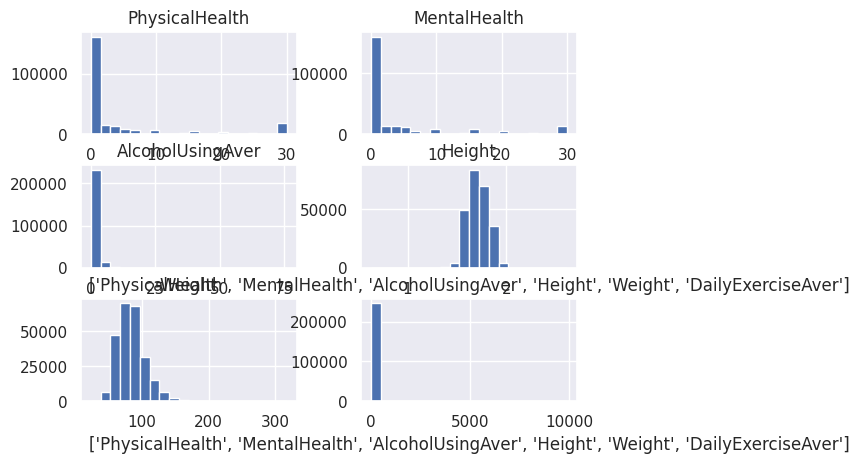

In [151]:
num_summary(df23, num_cols, plot=True)

In [152]:
df23[df23['AlcoholUsingAver'] >= 30]

,Sex,GeneralHealth,PhysicalHealth,MentalHealth,DoingExercise,HighBloodPressure,HighBloodPressureDrug,HighColesterol,HighColesterolDrug,HadHeartAttack,HadCoronaryHeartDisease,HadStroke,HadAsthma,HadSkinCancer,HadOtherCancer,HadLungDisease,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabate,Deaf,Blind,DifficultyWalking,SmokeUsing,ECigaretteUsing,AlcoholUsingAver,HadFluVac,HadPneumVac,HadZonaVac,HadCovid,HadCovidSemp,AgeCategory,Race,Height,Weight,DailyExerciseAver
8066,Male,Very good,0.000,2.000,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Some days,Not at all,40.000,No,No,No,Yes,No,30 to 34,"White only, Non-Hispanic",1.829,92.986,257.140
16500,Male,Very good,0.000,30.000,Yes,No,No,Yes,No,No,No,No,Yes,No,No,Yes,No,Yes,No,No,No,No,No,Not at all,Not at all,60.000,Yes,No,No,Yes,No,25 to 29,Hispanic,1.730,102.000,85.710
16778,Female,Very good,0.000,0.000,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Not at all,Not at all,76.000,No,No,No,No,No,65 to 69,"White only, Non-Hispanic",1.676,54.431,600.000
19751,Male,Very good,0.000,0.000,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Not at all,Not at all,30.000,No,No,Yes,Yes,No,70 to 74,"White only, Non-Hispanic",1.854,83.915,330.000
36233,Male,Fair,20.000,10.000,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Not at all,Not at all,30.000,Yes,No,No,No,No,35 to 39,Hispanic,1.620,72.575,0.000
39005,Male,Good,0.000,0.000,Yes,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Not at all,Every day,30.000,No,No,No,No,No,40 to 44,Hispanic,1.580,55.000,30.000
51050,Male,Fair,4.000,0.000,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,Not at all,Not at all,50.000,No,No,No,Yes,Yes,55 to 59,Hispanic,1.803,108.862,0.000
52560,Female,Very good,2.000,7.000,Yes,Yes,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,Not at all,Not at all,60.000,No,No,No,Yes,No,45 to 49,"White only, Non-Hispanic",1.676,58.967,21.430
73112,Female,Poor,0.000,30.000,No,Yes,No,Yes,No,No,No,No,No,No,No,Yes,Yes,No,Yes,No,No,Yes,Yes,Not at all,Not at all,30.000,Yes,Yes,No,No,No,45 to 49,"White only, Non-Hispanic",1.727,68.039,0.000
75199,Male,Good,0.000,30.000,Yes,Yes,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Not at all,Not at all,62.000,Yes,No,No,No,No,35 to 39,"Black only, Non-Hispanic",1.880,99.790,69.330


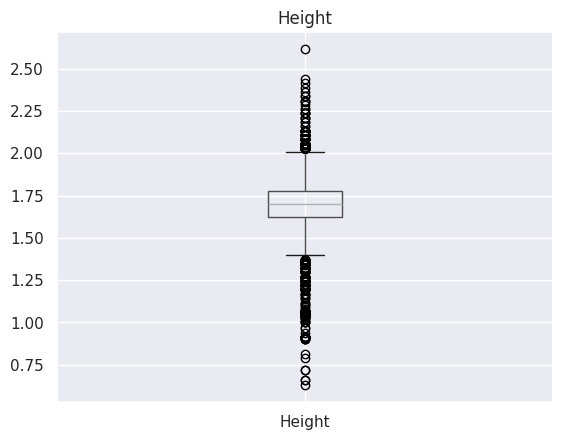

In [153]:
df23[["Height"]].boxplot()
plt.title("Height")
plt.show()

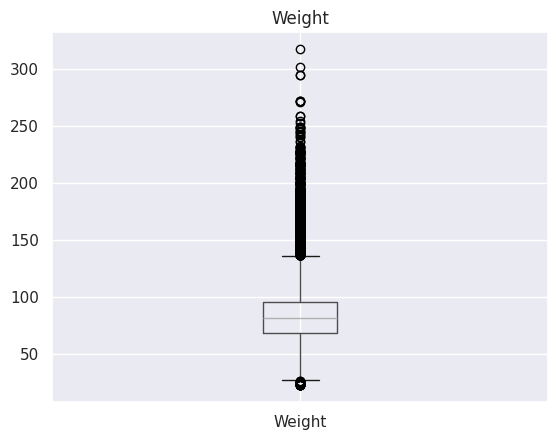

In [154]:
df23[["Weight"]].boxplot()
plt.title("Weight")
plt.show()

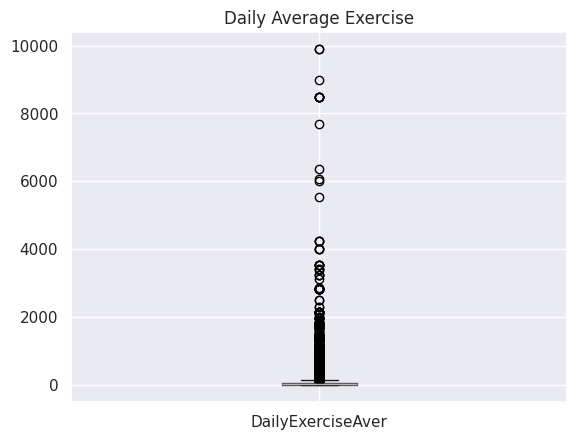

In [155]:
df23[["DailyExerciseAver"]].boxplot()
plt.title("Daily Average Exercise")
plt.show()

"Weight", "Height", ve "DailyExercisseAver" içerisinde fazlasıyla aykırı değer gözlemledik. Mantıksal bir algoritma ile veri setinin içerisinden bu değerleri düşürdük

In [156]:
df23 = df23[
    (df23['Weight'] >= 40) &
    (df23['Height'] >= 1.40) &
    (df23['Height'] <= 2.10) &
    (df23["DailyExerciseAver"] <= 300)
]
df23.shape

(242438, 36)

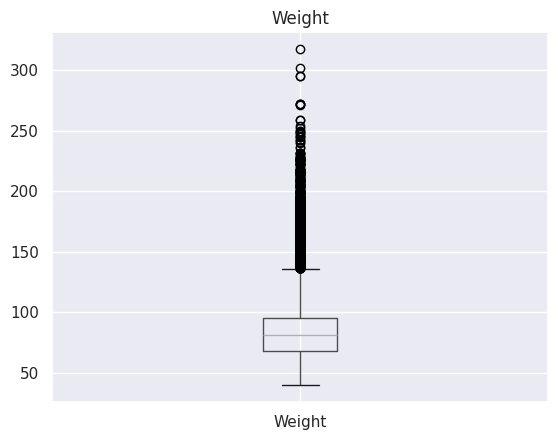

In [157]:
df23[["Weight"]].boxplot()
plt.title("Weight")
plt.show()

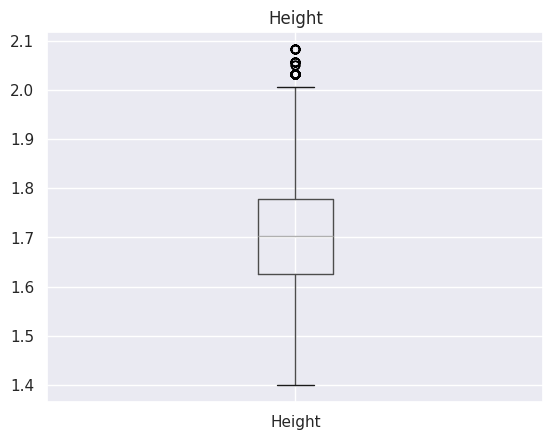

In [158]:
df23[["Height"]].boxplot()
plt.title("Height")
plt.show()

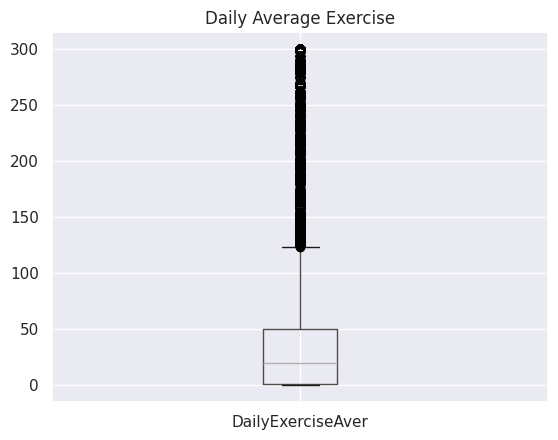

In [159]:
df23[["DailyExerciseAver"]].boxplot()
plt.title("Daily Average Exercise")
plt.show()

                       count   mean    std    min     5%    10%    20%    30%    40%    50%    60%    70%    80%     90%     95%     99%     max
PhysicalHealth    242438.000  4.334  8.643  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  2.000  5.000  19.000  30.000  30.000  30.000
MentalHealth      242438.000  4.059  7.976  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  2.000  5.000  15.000  30.000  30.000  30.000
AlcoholUsingAver  242438.000  1.144  1.812  0.000  0.000  0.000  0.000  0.000  0.000  1.000  1.000  1.000  2.000   3.000   4.000   8.000  76.000
Height            242438.000  1.702  0.104  1.400  1.549  1.575  1.600  1.626  1.676  1.702  1.727  1.753  1.803   1.829   1.880   1.930   2.083
Weight            242438.000 83.444 21.180 40.000 54.431 58.967 65.771 70.760 76.204 81.647 86.183 90.718 99.790 111.130 122.470 147.418 317.515
DailyExerciseAver 242438.000 38.199 52.178  0.000  0.000  0.000  0.000  6.430 12.860 19.290 28.570 42.860 65.710 100.000 142.860 2

<Figure size 1200x2000 with 0 Axes>

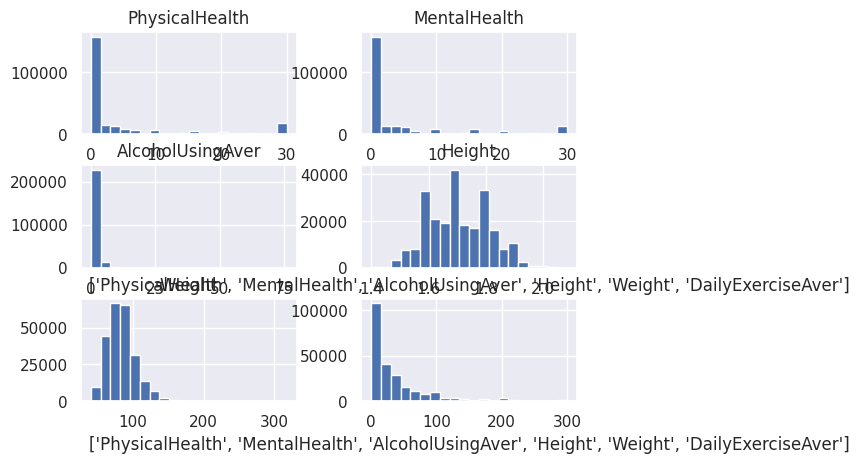

In [160]:
num_summary(df23, num_cols, plot=True)

In [161]:
df23.shape

(242438, 36)

In [162]:
for col in cat_cols:
    cat_summary(df23, col, plot=False)

           Sex  Ratio
Sex                  
Female  130258 53.728
Male    112180 46.272
##########################################
               GeneralHealth  Ratio
GeneralHealth                      
Very good              84411 34.818
Good                   79737 32.890
Excellent              36025 14.859
Fair                   32264 13.308
Poor                   10001  4.125
##########################################
               DoingExercise  Ratio
DoingExercise                      
Yes                   184364 76.046
No                     58074 23.954
##########################################
                                                    HighBloodPressure  Ratio
HighBloodPressure                                                           
No                                                             134648 55.539
Yes                                                            103757 42.797
Told borderline high or pre-hypertensive or ele...               2313  0.954
Ye

# ***Yeni Değişkenler***

"BMI_", "BMI_Category", "Cronic_Count", "Vaccine_Score", "Health_Tracking", "Drug_Tracking", "Old_Risk", "Nicotin_Score", "Risk_Score", "Risk_Level" gibi yeni değişkenler türettik.

In [163]:
df23["BMI_"] = df23["Weight"] / (df23["Height"] ** 2)
def bmi_kategori(bmi):
  if bmi < 18.5:
    return "Underweight"
  elif bmi < 25:
    return "Normal"
  elif bmi < 30:
    return "Overweight"
  elif bmi < 35:
    return "Obese (Class I)"
  elif bmi < 40:
    return "Obese (Class II)"
  else:
    return "Obese (Class I)"
df23["BMI_Category"] = df23["BMI_"].apply(bmi_kategori)

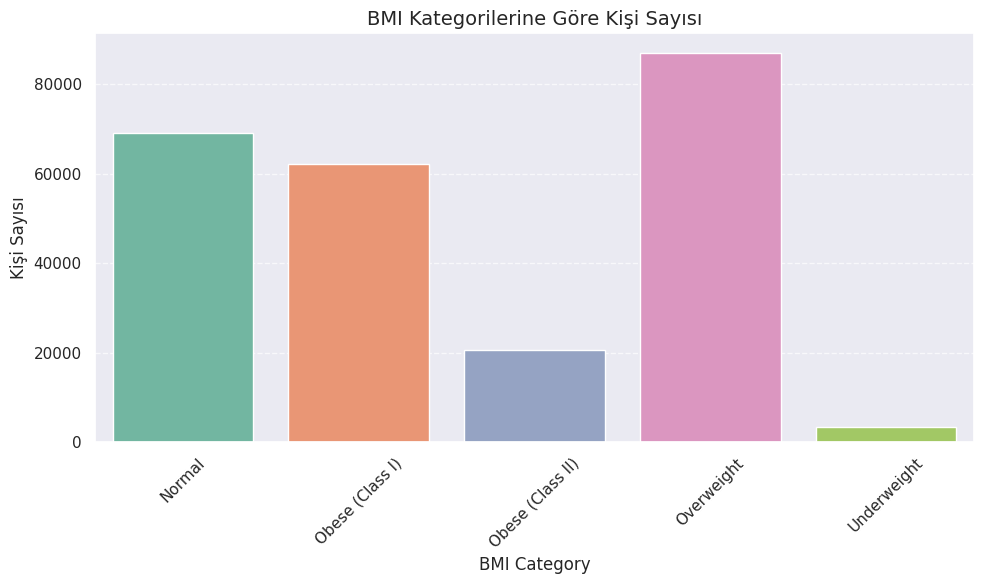

In [164]:
bmi_counts = df23["BMI_Category"].value_counts().sort_index()  # Kategorileri sıralı tutmak için sort_index()
# Sütun grafik çizimi
plt.figure(figsize=(10, 6))
sns.barplot(x=bmi_counts.index, y=bmi_counts.values, palette="Set2")

plt.title("BMI Kategorilerine Göre Kişi Sayısı", fontsize=14)
plt.xlabel("BMI Category")
plt.ylabel("Kişi Sayısı")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [165]:
# Kronik Hastalık Skoru
chronic_cols = ["HadHeartAttack", "HadCoronaryHeartDisease", "HadStroke", "HadAsthma", "HadSkinCancer",
                "HadOtherCancer", "HadLungDisease", "HadDepressiveDisorder", "HadKidneyDisease",
                "HadArthritis", "HadDiabate"]
df23["Cronic_Count"] = df23[chronic_cols].apply(lambda row: (row == 'Yes').sum(), axis=1)

In [166]:
# Aşı Skoru
vaccine_cols = ["HadFluVac", "HadPneumVac", "HadZonaVac"]
df23["Vaccine_Score"] = df23[vaccine_cols].apply(lambda row: (row == "Yes").sum(), axis=1)

In [167]:
# Sağlık Tabiki
track_cols = ["HighBloodPressure", "HighColesterol"]
df23["Health_Tracking"] = df23[track_cols].apply(lambda row: (row == "Yes").sum(), axis=1)

In [168]:
# İlaç Tabiki
drug_cols = ["HighBloodPressureDrug", "HighColesterolDrug"]
df23["Drug_Tracking"] = df23[drug_cols].apply(lambda row: (row == "Yes").sum(), axis=1)

In [169]:
# Yaşlılık Riski
senior_ages = ["65 to 69", "70 to 74", "75 to 79", "80 or older"]
# Yeni sütunu oluştur
df23["Old_Risk"] = df23["AgeCategory"].apply(lambda x: "Yes" if x in senior_ages else "No")

In [170]:
# Nikotin Skoru
def calculate_nicotin_score(smoke, ecig):
  smoke_score = 0
  ecig_score = 0

  # SmokeUsing için puan
  if smoke == "Not at all (right now)":
    smoke_score = 0
  elif smoke == "Some days":
    smoke_score = 1
  elif smoke == "Every day":
    smoke_score = 2

  # ECigaretteUsing için puan
  if ecig == "Not at all (right now)":
    ecig_score = 0
  elif ecig == "Some days":
    ecig_score = 1
  elif ecig == "Every day":
    ecig_score = 2

  # Toplam skoru döndür
  return smoke_score + ecig_score

# Skoru oluşturmak için apply kullanıyoruz
df23["Nicotin_Score"] = df23.apply(lambda row: calculate_nicotin_score(row["SmokeUsing"], row["ECigaretteUsing"]), axis=1)

In [171]:
# Risk Skoru
df23["Risk_Score"] = (df23["Cronic_Count"] + df23["Health_Tracking"] + df23["Nicotin_Score"] + (df23["BMI_"] > 35).astype(int) + (df23["Old_Risk"] == "Yes").astype(int))

In [172]:
def risk_cat(risk_level):
  if 0 <= risk_level <= 5:
    return "Risk Level 1"
  elif 6 <= risk_level <= 10:
    return "Risk Level 2"
  elif 11 <= risk_level <= 16:
    return "Risk Level 3"
df23["Risk_Level"] = df23["Risk_Score"].apply(risk_cat)

In [173]:
df23.shape

(242438, 46)

In [174]:
df23.to_csv("temizlenmis_cdc_23.csv", index=False)

# ***Encoding***

In [175]:
!pip install lightgbm

In [176]:
def label_encoder(dataframe, binary_cols):
    labelencoder = LabelEncoder()
    for col in binary_cols:
        dataframe[col] = labelencoder.fit_transform(dataframe[col])
    return dataframe

def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first, dtype="int64")
    return dataframe

In [177]:
binary_cols = [col for col in df23.columns if df23[col].dtype not in [int, float]
               and df23[col].nunique() == 2]
ohe_cols = [col for col in df23.columns if 30 >= df23[col].nunique() > 2]

In [178]:
df23 = label_encoder(df23, binary_cols)

In [179]:
df23 = one_hot_encoder(df23, ohe_cols)

# ***Modelleme***

In [84]:
!pip install lightgbm

In [181]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, learning_curve
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix,  roc_curve, auc

In [182]:
df23.head()

,Sex,PhysicalHealth,MentalHealth,DoingExercise,HighBloodPressureDrug,HighColesterol,HighColesterolDrug,HadHeartAttack,HadCoronaryHeartDisease,HadStroke,HadAsthma,HadSkinCancer,HadOtherCancer,HadLungDisease,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,Deaf,Blind,DifficultyWalking,AlcoholUsingAver,HadFluVac,HadPneumVac,HadZonaVac,HadCovid,HadCovidSemp,Height,Weight,DailyExerciseAver,BMI_,Old_Risk,GeneralHealth_Fair,GeneralHealth_Good,GeneralHealth_Poor,GeneralHealth_Very good,HighBloodPressure_Told borderline high or pre-hypertensive or elevated blood pressure,HighBloodPressure_Yes,"HighBloodPressure_Yes, but female told only during pregnancy","HadDiabate_No, pre-diabetes or borderline diabetes",HadDiabate_Yes,"HadDiabate_Yes, but female told only during pregnancy",SmokeUsing_Not at all,SmokeUsing_Some days,ECigaretteUsing_Not at all,ECigaretteUsing_Some days,AgeCategory_25 to 29,AgeCategory_30 to 34,AgeCategory_35 to 39,AgeCategory_40 to 44,AgeCategory_45 to 49,AgeCategory_50 to 54,AgeCategory_55 to 59,AgeCategory_60 to 64,AgeCategory_65 to 69,AgeCategory_70 to 74,AgeCategory_75 to 79,AgeCategory_80 or older,Race_Hispanic,"Race_Multiracial, Non-Hispanic","Race_Other race only, Non-Hispanic","Race_White only, Non-Hispanic",BMI_Category_Obese (Class I),BMI_Category_Obese (Class II),BMI_Category_Overweight,BMI_Category_Underweight,Cronic_Count_1,Cronic_Count_2,Cronic_Count_3,Cronic_Count_4,Cronic_Count_5,Cronic_Count_6,Cronic_Count_7,Cronic_Count_8,Cronic_Count_9,Cronic_Count_10,Vaccine_Score_1,Vaccine_Score_2,Vaccine_Score_3,Health_Tracking_1,Health_Tracking_2,Drug_Tracking_1,Drug_Tracking_2,Nicotin_Score_1,Nicotin_Score_2,Nicotin_Score_3,Nicotin_Score_4,Risk_Score_1,Risk_Score_2,Risk_Score_3,Risk_Score_4,Risk_Score_5,Risk_Score_6,Risk_Score_7,Risk_Score_8,Risk_Score_9,Risk_Score_10,Risk_Score_11,Risk_Score_12,Risk_Score_13,Risk_Score_14,Risk_Score_16,Risk_Level_Risk Level 2,Risk_Level_Risk Level 3
0,0,0.000,0.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.000,0,0,0,0,0,1.600,78.018,0.000,30.468,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.000,0.000,1,0,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0.000,1,1,0,0,0,1.448,59.874,25.710,28.564,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,2.000,0.000,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0.000,1,1,0,0,0,1.676,77.111,12.860,27.438,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.000,0.000,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1.000,0,1,0,0,0,1.727,77.111,12.860,25.848,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
5,0,2.000,3.000,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.000,0,0,0,1,0,1.575,74.843,18.000,30.179,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [183]:
# Hedef değişken ve özellikler
y = df23["HadHeartAttack"]
X = df23.drop("HadHeartAttack", axis=1)

# Sütun adlarını düzenle (geçersiz karakterleri alt çizgiye çevir)
X.columns = X.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)

# Veriyi eğitim ve test olarak ayır (önce ayır, sonra SMOTE)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Sadece eğitim verisine SMOTE uygula
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [184]:
lgbm_model = LGBMClassifier(random_state=17).fit(X_train_resampled, y_train_resampled)

[LightGBM] [Info] Number of positive: 183497, number of negative: 183497
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.464121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1969
[LightGBM] [Info] Number of data points in the train set: 366994, number of used features: 99
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [185]:
cv_results = cross_validate(lgbm_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

[LightGBM] [Info] Number of positive: 10453, number of negative: 183497
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.095417 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1066
[LightGBM] [Info] Number of data points in the train set: 193950, number of used features: 99
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.053895 -> initscore=-2.865309
[LightGBM] [Info] Start training from score -2.865309
[LightGBM] [Info] Number of positive: 10453, number of negative: 183497
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.094370 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 193950, number of used features: 98
[LightGBM] [In

In [186]:
print(cv_results['test_accuracy'].mean())
print(cv_results['test_f1'].mean())
print(cv_results['test_roc_auc'].mean())

0.9903191719018556
0.9065041491274478
0.9984299049031732


In [187]:
y_pred = lgbm_model.predict(X_test)

Classification Report:

              precision  recall  f1-score   support
Class 0           0.980   0.990     0.980 45875.000
Class 1           0.790   0.580     0.670  2613.000
accuracy          0.970   0.970     0.970     0.970
macro avg         0.880   0.790     0.830 48488.000
weighted avg      0.970   0.970     0.970 48488.000


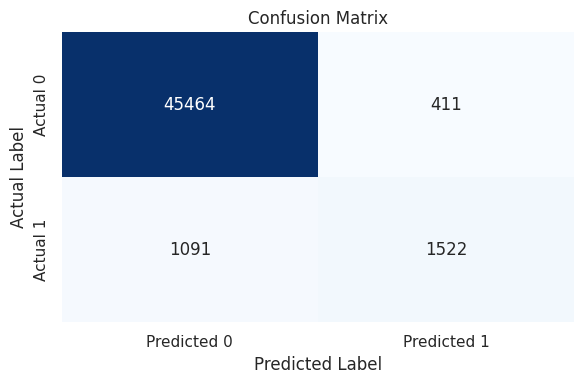

In [188]:
def print_classification_results(y_true, y_pred):
    # Classification Report
    print("Classification Report:\n")
    report = classification_report(y_true, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    print(report_df.round(2))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title("Confusion Matrix")
    plt.ylabel("Actual Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()
    plt.show()

print_classification_results(y_test, y_pred)
# # Sınıflandırma raporu
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

# # Karmaşıklık matrisi
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))

In [189]:
best_params = {
    'learning_rate': 0.05,
    'max_depth': 7,
    'n_estimators': 500,
    "subsample": 0.8,
    "colsample_bytree": 0.8}
lgbm_final = lgbm_model.set_params(**best_params, random_state=17).fit(X_train_resampled, y_train_resampled)
y_pred = lgbm_final.predict(X_test)

[LightGBM] [Info] Number of positive: 183497, number of negative: 183497
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.172506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1969
[LightGBM] [Info] Number of data points in the train set: 366994, number of used features: 99
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [190]:
cv_results = cross_validate(lgbm_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

[LightGBM] [Info] Number of positive: 10453, number of negative: 183497
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.094804 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1066
[LightGBM] [Info] Number of data points in the train set: 193950, number of used features: 99
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.053895 -> initscore=-2.865309
[LightGBM] [Info] Start training from score -2.865309
[LightGBM] [Info] Number of positive: 10453, number of negative: 183497
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.165066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 193950, number of used features: 98
[LightGBM] [In

In [199]:
# Over fitting test ve train accuracy baktık
print("Train Accuracy:", lgbm_final.score(X_train_resampled, y_train_resampled))
print("Test Accuracy :", lgbm_final.score(X_test, y_test))

Train Accuracy: 0.9937246930467528
Test Accuracy : 0.9881001484903481


Classification Report:

              precision  recall  f1-score   support
Class 0           0.990   1.000     0.990 45875.000
Class 1           0.930   0.840     0.880  2613.000
accuracy          0.990   0.990     0.990     0.990
macro avg         0.960   0.920     0.940 48488.000
weighted avg      0.990   0.990     0.990 48488.000


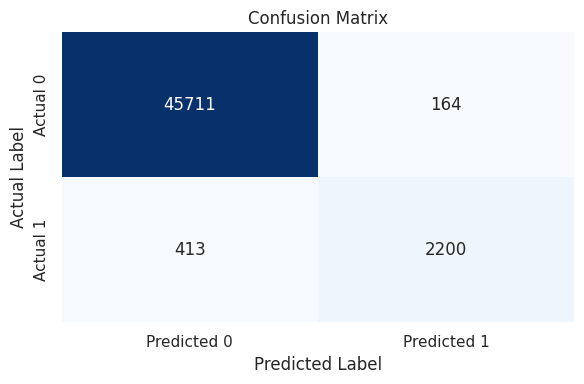

In [192]:
print_classification_results(y_test, y_pred)

In [193]:
def plot_learning_curve(model, X, y, cv=5, scoring='roc_auc'):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, scoring=scoring, n_jobs=-1)

    train_scores_mean = train_scores.mean(axis=1)
    test_scores_mean = test_scores.mean(axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, label="Train Score", color="blue")
    plt.plot(train_sizes, test_scores_mean, label="Validation Score", color="orange")
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size")
    plt.ylabel(scoring.capitalize())
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

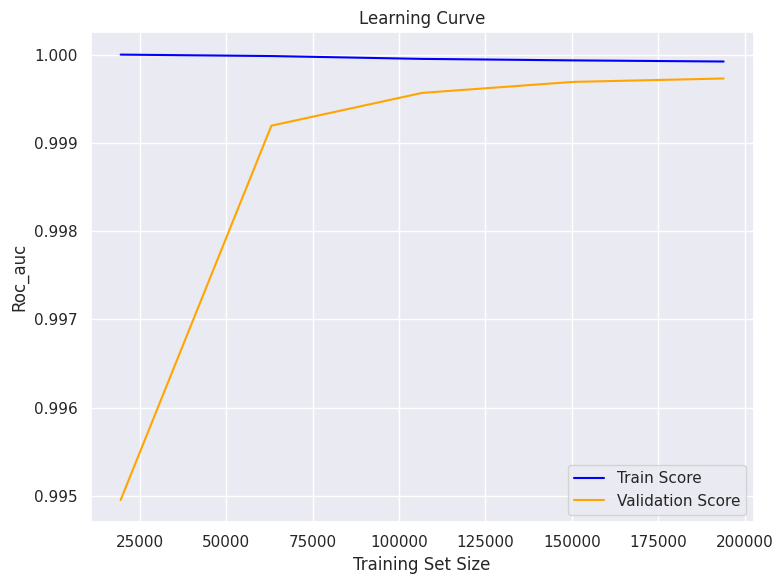

In [197]:
plot_learning_curve(lgbm_final, X, y)

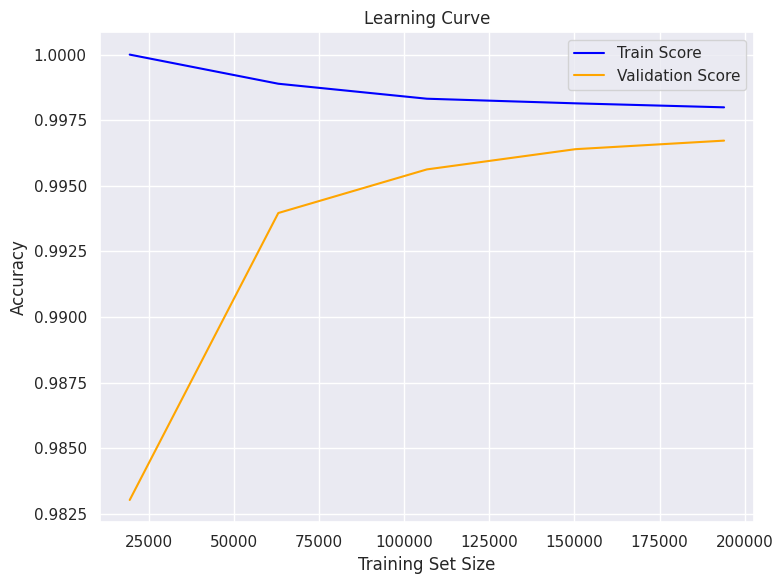

In [198]:
plot_learning_curve(lgbm_final, X, y, scoring='accuracy')

In [200]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(20, 20))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

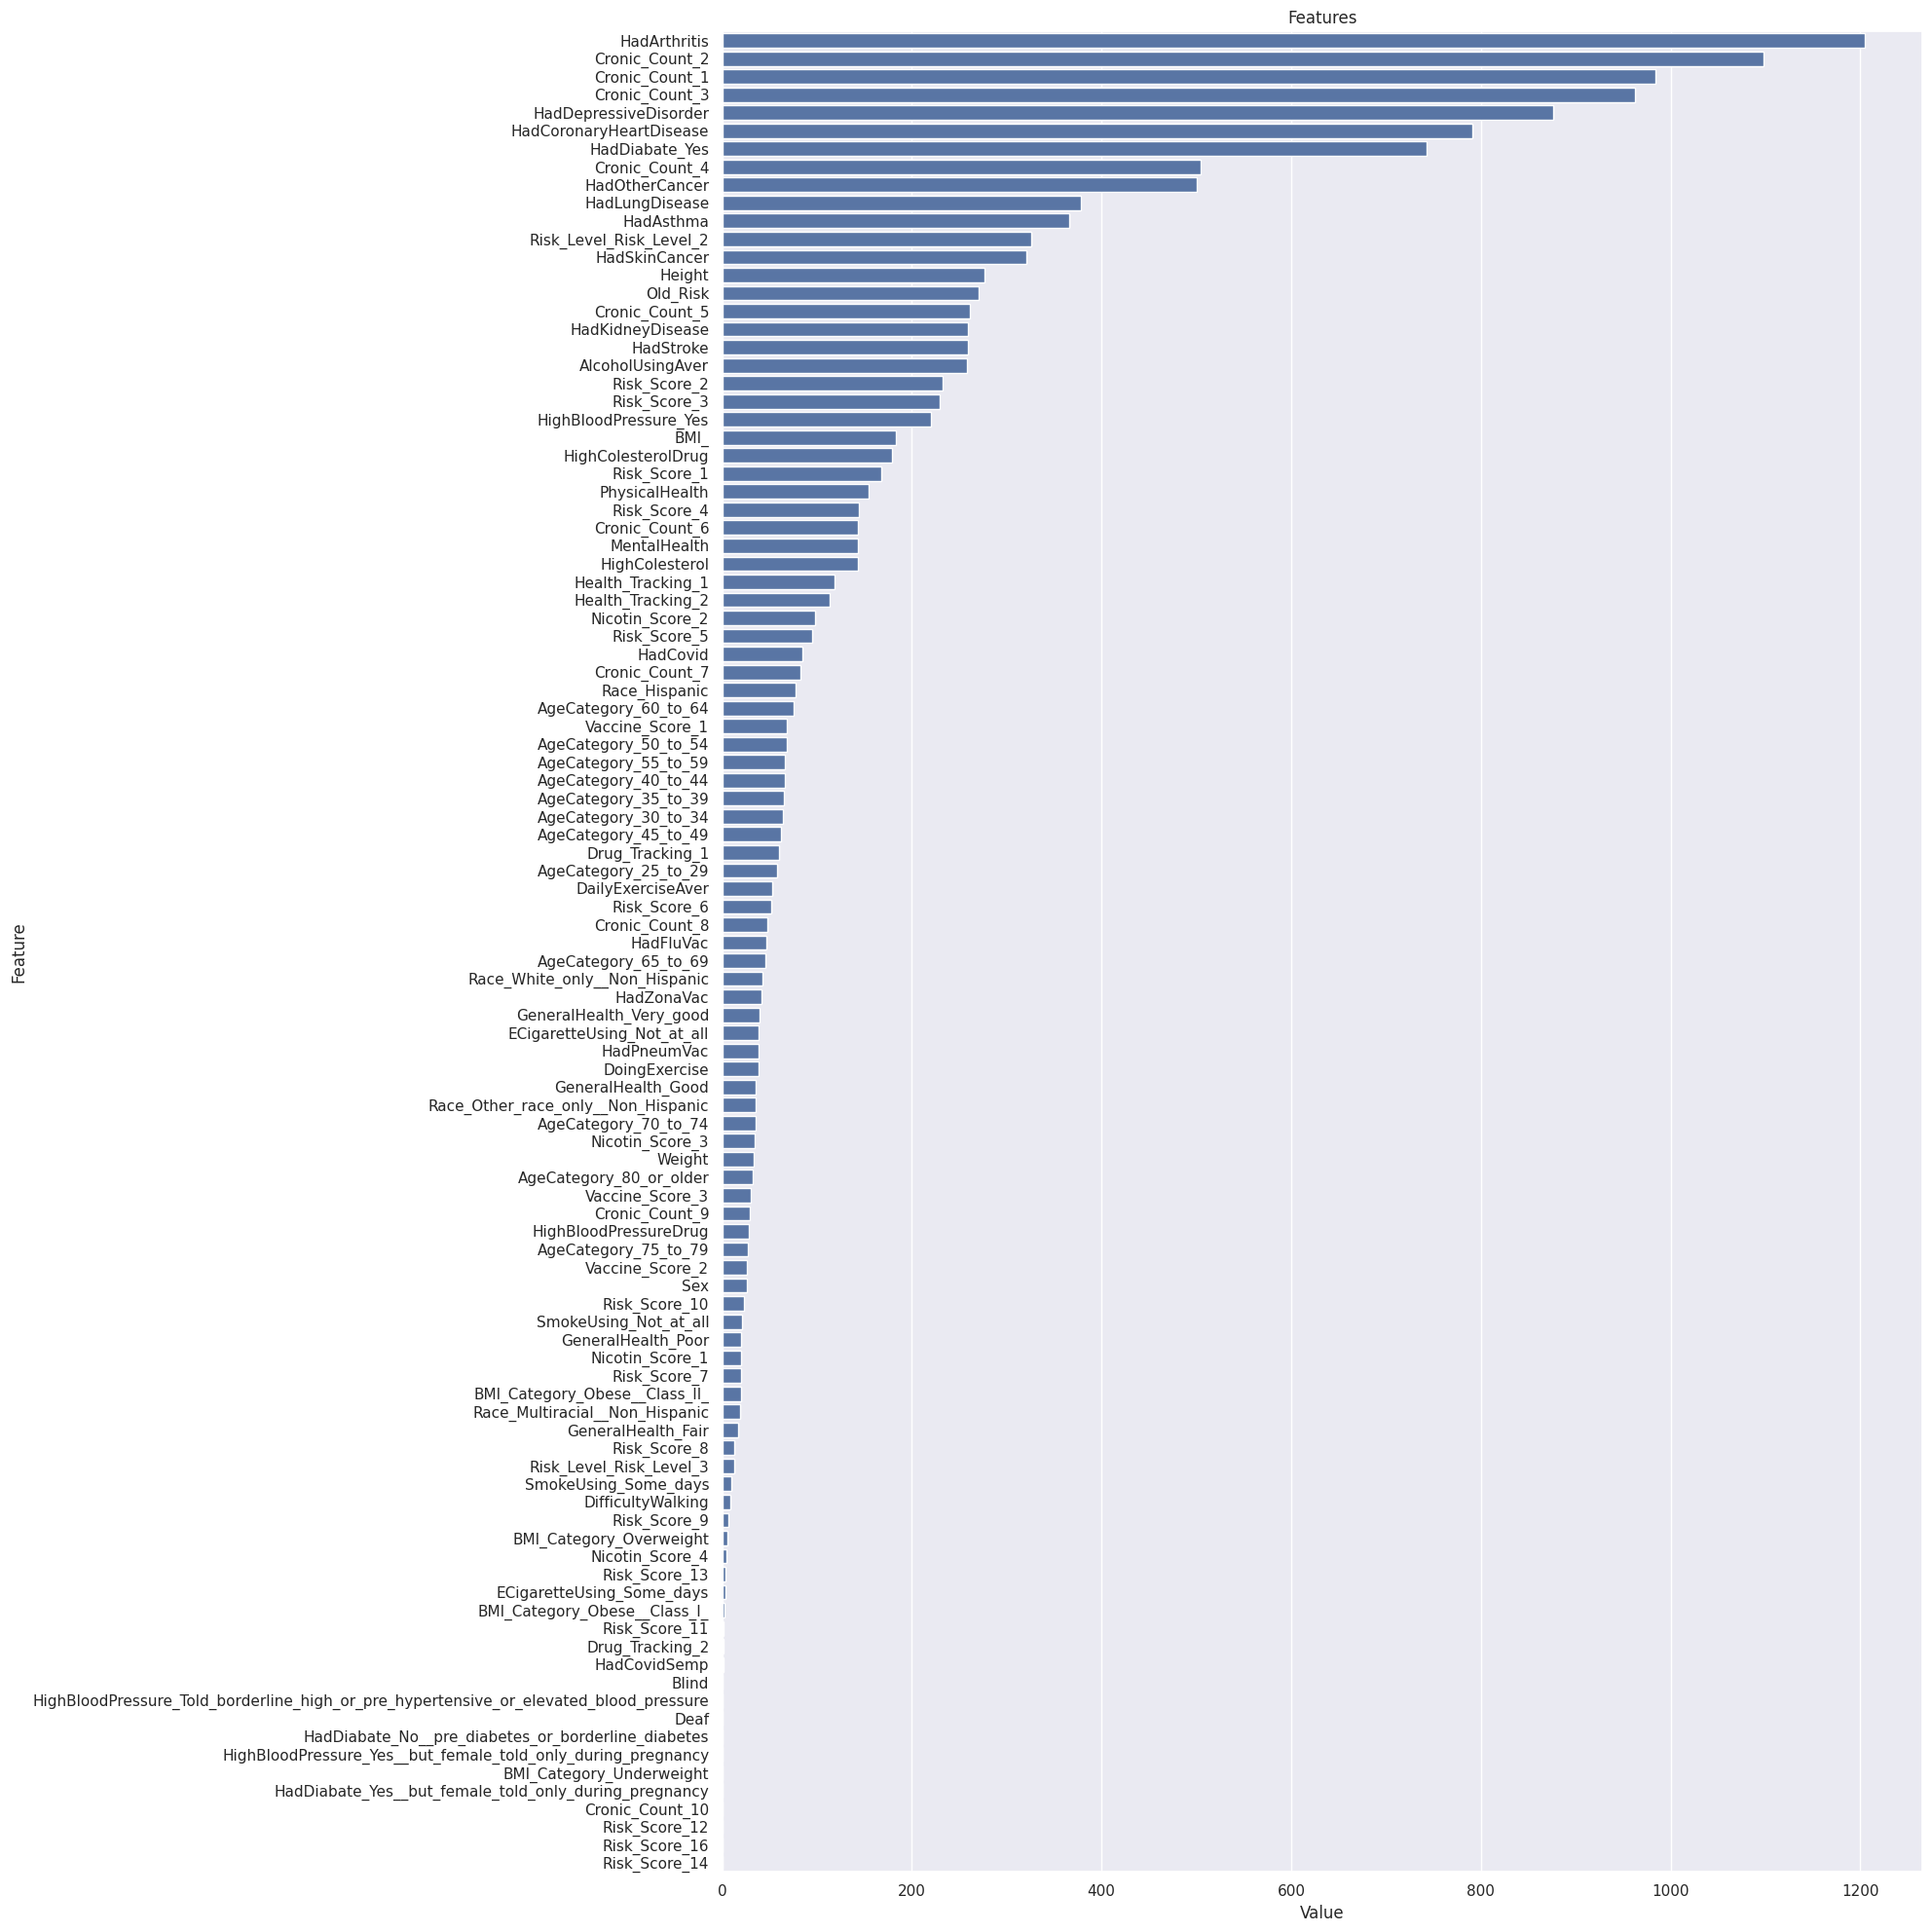

In [201]:
plot_importance(lgbm_model, X_resampled, num=len(X), save=False)

In [202]:
def plot_roc_curve(model, X_test, y_test):
    y_proba = model.predict_proba(X_test)[:, 1]  # Pozitif sınıf olasılıkları
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Eğrisi')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    return roc_auc

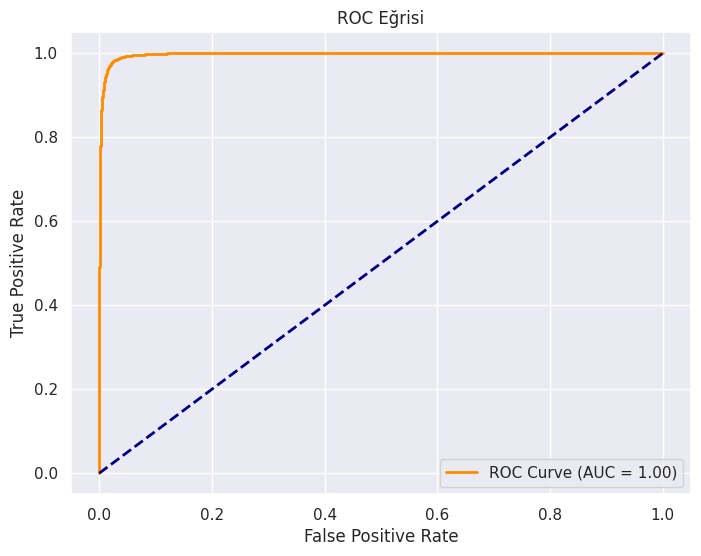

np.float64(0.9972148479985318)

In [203]:
plot_roc_curve(lgbm_model, X_test, y_test)